<a href="https://colab.research.google.com/github/SamDewriter/week7-CausalGraph/blob/main/CausalNex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab

In [3]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:39
🔁 Restarting kernel...


In [1]:
!conda install pygraphviz

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h3371d22_4         560 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    expat-2.4.1                |       h9c3ff4c_0         182 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-s

In [1]:
!pip install causalnex

In [2]:
!pip install dowhy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

In [4]:
df = pd.read_csv('data.csv')

In [5]:
causal_df = df.drop(['id', 'Unnamed: 32'], axis=1).copy()

In [6]:
d = {'B':0, 'M':1}
causal_df['diagnosis'] = causal_df['diagnosis'].map(d)

In [7]:
causal_df['low_radius'] = causal_df['radius_mean'].apply(lambda x: True if x < 18 else False)

In [8]:
new_df = causal_df.iloc[:, :20]

In [ ]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
sm = from_pandas(new_df)

In [116]:
from IPython.display import Image

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


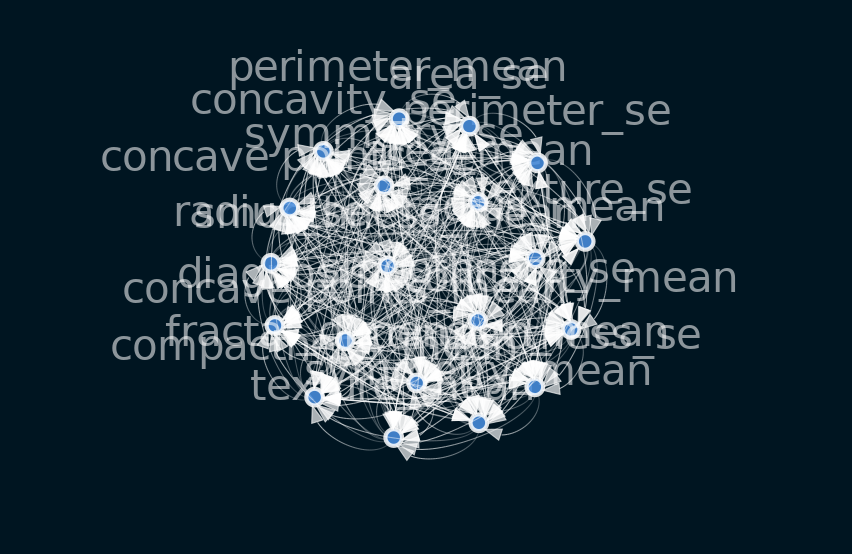

In [117]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


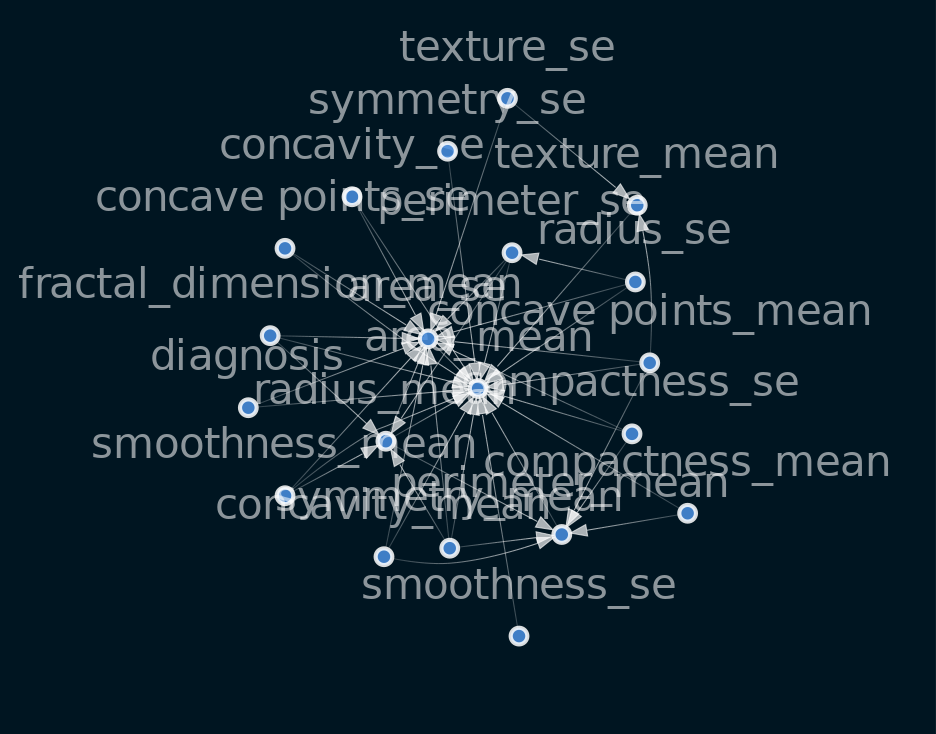

In [118]:
sm.remove_edges_below_threshold(2.0)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [1]:
sm = from_pandas(causal_df, tabu_edges=[("radius_se", "smoothness_se")], w_threshold=0.8)

NameError: ignored

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


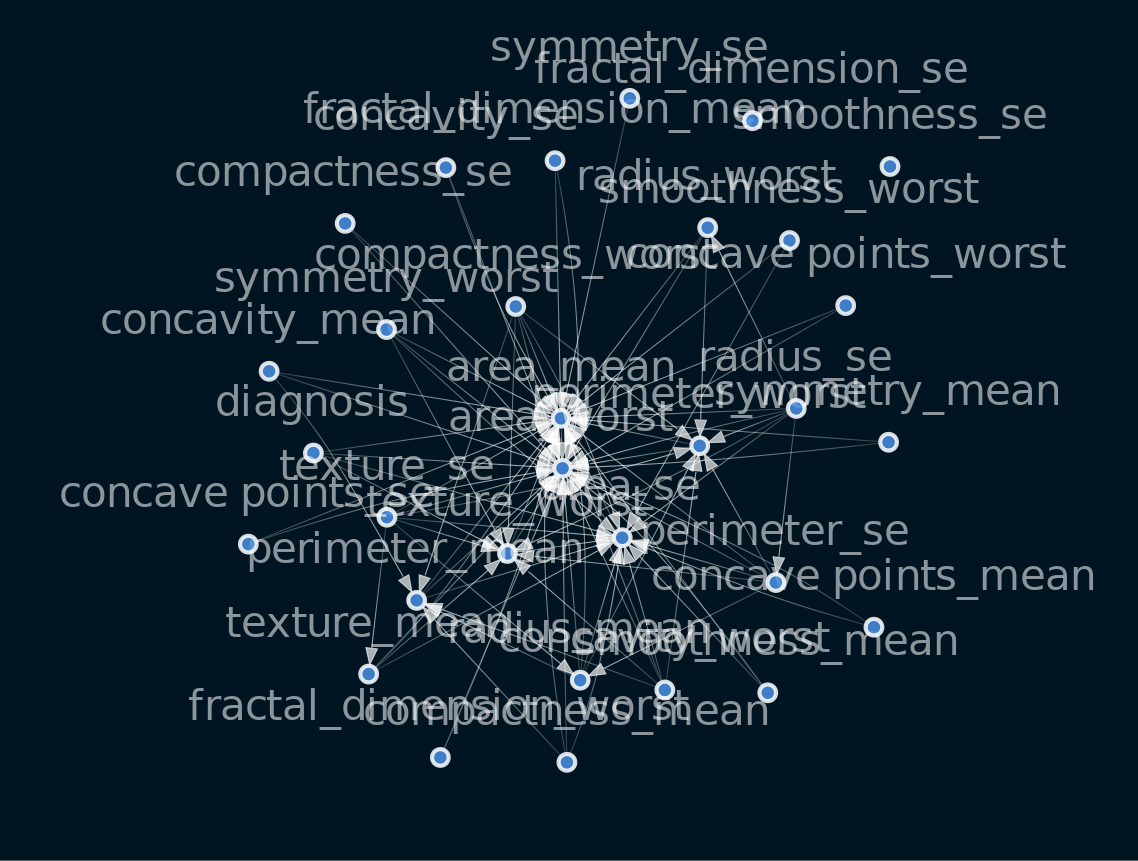

In [120]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

The relationship between the features in the above figure is still not very clear, we can correct this by deleting some edges that seems to be very erroneous 

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


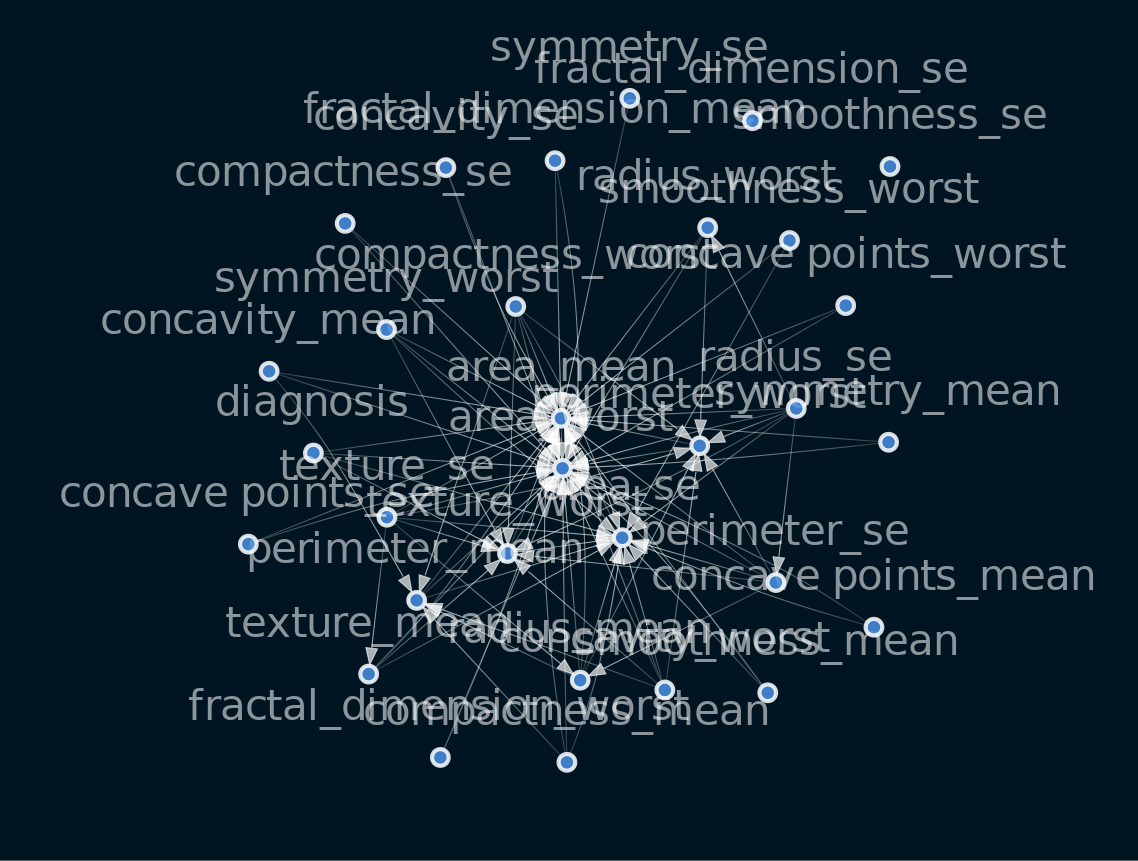

In [68]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


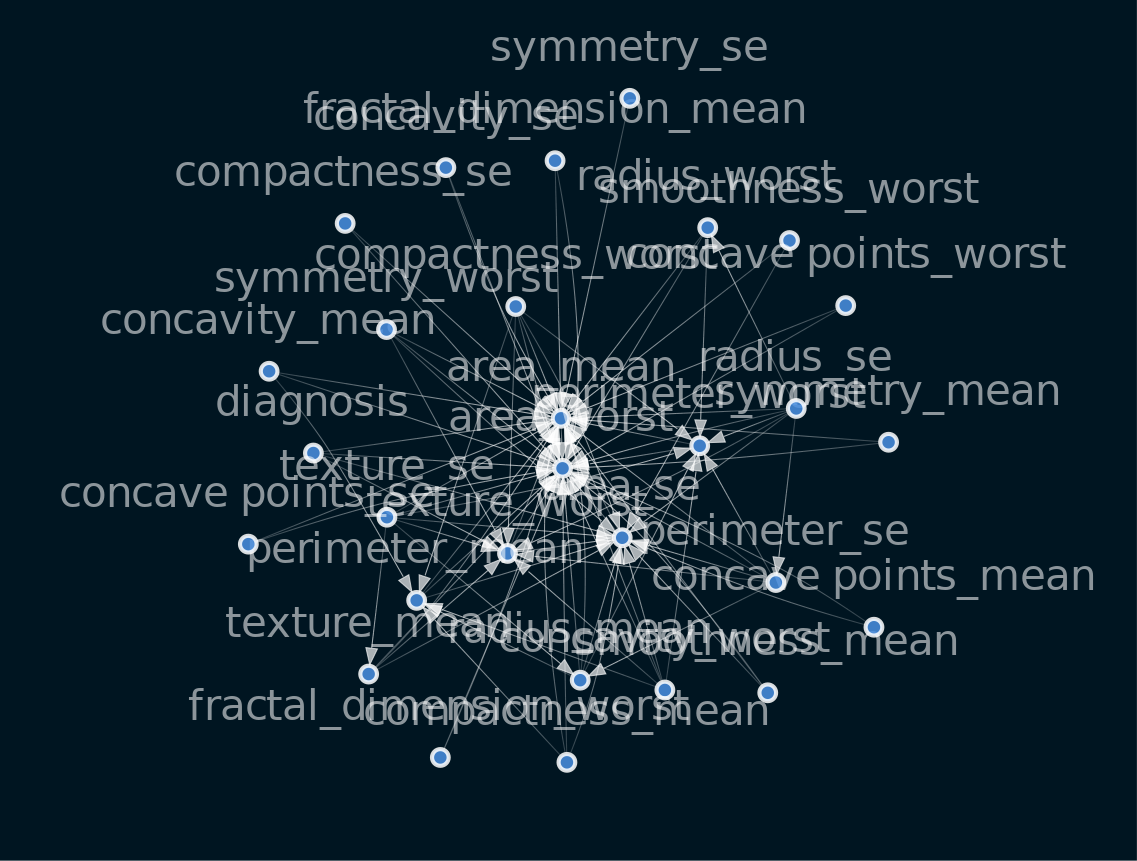

In [121]:
sm = sm.get_largest_subgraph()

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [123]:
from causalnex.network import BayesianNetwork
bn = BayesianNetwork(sm)

In [125]:
nodes = sm.nodes

In [126]:
node_list = []
for i in nodes:
  node_list.append(i)
len(node_list)

In [149]:
prob_df = causal_df.copy()

In [150]:
prob_df = prob_df.drop(['low_radius', 'smoothness_se', 'fractal_dimension_se'], axis =1)

In [155]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(prob_df, train_size=0.5, test_size=0.1, random_state=7)

In [164]:
bn = bn.fit_node_states(causal_df)

In [165]:
bn = bn.fit_cpds(causal_df, method="BayesianEstimator", bayes_prior="K2")

/usr/local/lib/python3.7/site-packages/causalnex/network/network.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(self._node_states[col])


ValueError: ignored